Import packages

In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib as jb

Import dataset

In [2]:
gold_dataset=pd.read_csv('gld_price_data.csv')

Understanding the dataset

In [3]:
# print first five rows
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last five rows
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# shape of dataset
gold_dataset.shape

(2290, 6)

In [6]:
# infor about dataset
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# stats of dataset
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Graphs

In [8]:
corrections=gold_dataset.corr()

<AxesSubplot:>

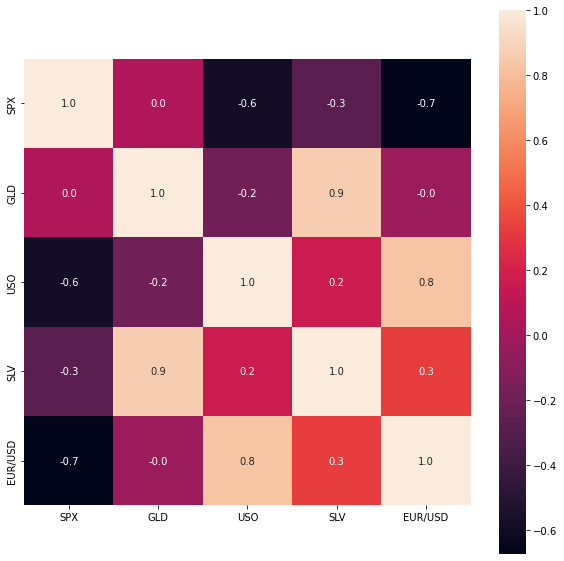

In [9]:
# construction a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(
  corrections,
  square=True,
  annot=True,
  annot_kws={'size':10},
  fmt='.1f'
)

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Sohail\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

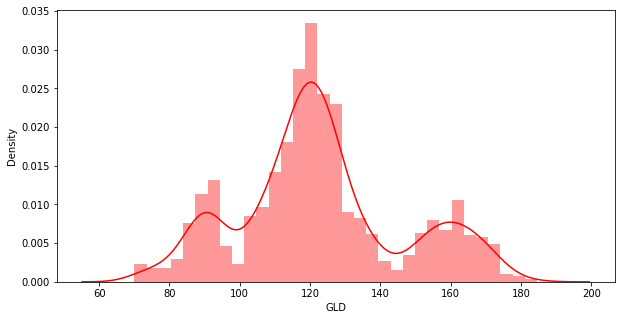

In [10]:
print(corrections['GLD'])
plot=plt.figure(figsize=(10,5))
sns.distplot(gold_dataset['GLD'],color='red')

Assign X and Y label

In [11]:
X=gold_dataset.drop(['Date','GLD'], axis=1)
Y=gold_dataset['GLD']

In [12]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1832, 4)
(458, 4)


Model Training => Random forest regressor

In [16]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
# fitting data in model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [18]:
# predictions on training data
training_data_prediction=regressor.predict(X_train)
print(training_data_prediction)

[109.95779829 114.72200054  90.7662001  ... 130.68469676 159.45619526
 114.95679983]


In [22]:
# R squared error
training_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("Training R squared error : ", training_error_score)

Training R squared error :  0.9983861267946824


In [23]:
# predictions on testing data
testing_data_prediction=regressor.predict(X_test)
print(testing_data_prediction)

[168.75479936  81.79919975 115.71489981 127.72710048 120.88250116
 154.82449723 150.01249905 126.05920062 117.51279864 126.04570065
 116.95090081 171.63890075 141.06359837 168.1417984  114.87880035
 117.88840049 139.25330353 169.89510112 159.66130246 158.22389973
 155.1313003  125.17670024 175.68449993 157.16250366 125.21310042
  93.67329966  78.17740016 120.64300004 119.13179975 167.43479935
  88.0116005  125.3349002   91.03410067 117.70519977 120.95059951
 136.2551008  115.35360156 115.68150055 148.6787999  106.93260065
 104.59750271  87.23449792 126.48160069 118.16519975 152.67879901
 119.70189984 108.38430014 107.98869818  93.15430082 127.10219766
  75.33310013 113.63019909 121.27830035 111.3477987  118.94749916
 120.82709943 159.28999917 167.75220182 146.93749661  85.92559896
  94.47670033  86.89069913  90.45500026 119.01710054 126.45830082
 127.35930028 167.91259944 122.20759958 117.54739858  98.43900021
 167.91200138 143.05249886 131.87250277 121.22220221 121.30759954
 119.71410

In [24]:
# R squared error
testing_error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("Testing R squared error : ", testing_error_score)

Testing R squared error :  0.9892559428902058


Compare the Actual Values and Predicted Values in a Plot

In [25]:
Y_test_list = list(Y_test)

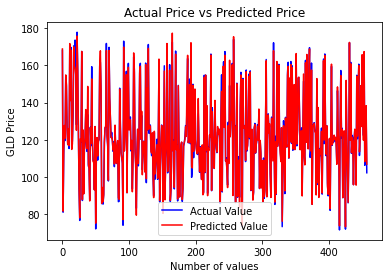

In [27]:
plt.plot(Y_test_list, color='blue', label = 'Actual Value')
plt.plot(testing_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:
# save the model
jb.dump(regressor,'gold_price_regressor.joblib')

['gold_price_regressor.joblib']